# **Predicting Hiring Decisions in Recruitment Data**

## *Problem Statement:*

Develop a predictive model to decide who is competent or qualifies for the job.

## **About the Dataset**

There are 11 columns/features and 1.5k rows/samples.

**Age**—20 to 50 years.

**Gender**—Male (0) or Female (1).

**Education Level**—Highest level of education attained by the candidate. 1: Bachelor's (Type 1), 2: Bachelor's (Type 2), 3: Masters, 4:PhD

**Experience Year**_dNumber of years of professional experience.(0 to 15 years).

**Distance From Company**_Distance in kilometers from the candidate's residence to the hiring company.(1 to 50 kilometers).

**Interview Score**_Score achieved by the candidate in the interview process.(0 to 100).

**Skill Score**_Assessment score of the candidate's technical skills.(0 to 100).

**Personality Score**_Evaluation score of the candidate's personality traits.(0 to 100).

**Recruitment Strategy**_Strategy adopted by the hiring team for recruitment. (1: Aggressive, 2: Moderate, 
3:Conservative)

**Hiring Decision (Target Variable)**_Outcome of the hiring decision. (0: Not hired,1: Hire).


In [191]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_auc_score , ConfusionMatrixDisplay
from sklearn.svm import SVC
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [192]:
#Load dataset
df = pd.read_csv("recruitment_data.csv")
df

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0
...,...,...,...,...,...,...,...,...,...,...,...
1495,48,0,2,3,4,9.183783,66,3,80,3,1
1496,27,1,2,10,3,14.847731,43,97,7,2,0
1497,24,1,1,1,2,4.289911,31,91,58,1,1
1498,48,0,2,4,4,36.299263,9,37,44,2,1


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1500 non-null   int64  
 1   Gender               1500 non-null   int64  
 2   EducationLevel       1500 non-null   int64  
 3   ExperienceYears      1500 non-null   int64  
 4   PreviousCompanies    1500 non-null   int64  
 5   DistanceFromCompany  1500 non-null   float64
 6   InterviewScore       1500 non-null   int64  
 7   SkillScore           1500 non-null   int64  
 8   PersonalityScore     1500 non-null   int64  
 9   RecruitmentStrategy  1500 non-null   int64  
 10  HiringDecision       1500 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 129.0 KB


In [194]:
df.head()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0


#### Since there are no missing data, we continue with data visualization

## Data Visualization

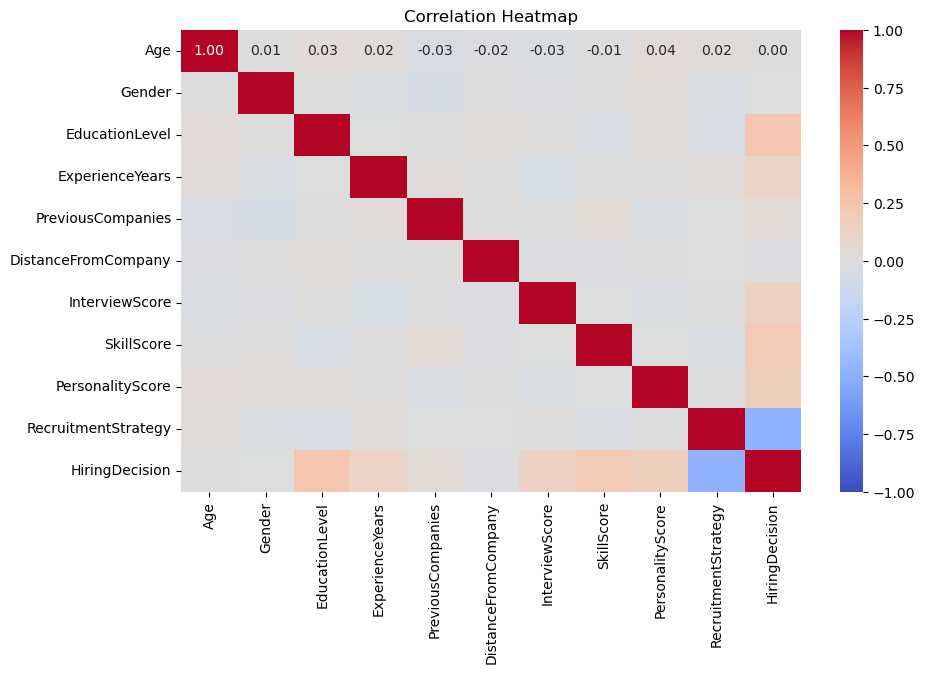

In [195]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
corr_matrix = df.corr()
heatmap = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()


In [196]:
# Select relevant features and target variable
X =df.drop(columns=['HiringDecision'])
y = df['HiringDecision']

In [197]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [198]:
# Fit the logistic regression model
logit_model = sm.Logit(y_train, sm.add_constant(X_train))
result = logit_model.fit()


Optimization terminated successfully.
         Current function value: 0.359713
         Iterations 7


In [199]:
# Make predictions and evaluate the model
predictions = result.predict(sm.add_constant(X_test))
print(predictions)

1116    0.596026
1368    0.044436
422     0.691685
413     0.021551
451     0.004699
          ...   
155     0.036133
1151    0.398110
1141    0.005997
974     0.082292
1057    0.614812
Length: 375, dtype: float64


In [200]:
# Make predictions on the test set
predictions_binary = (predictions > 0.5).astype(int)
print (predictions_binary)

1116    1
1368    0
422     1
413     0
451     0
       ..
155     0
1151    0
1141    0
974     0
1057    1
Length: 375, dtype: int32


In [201]:
# Evaluate the model
log_accuracy = accuracy_score(y_test, predictions_binary)
log_accuracy_round = np.round(log_accuracy, 3)
print(log_accuracy)

0.864


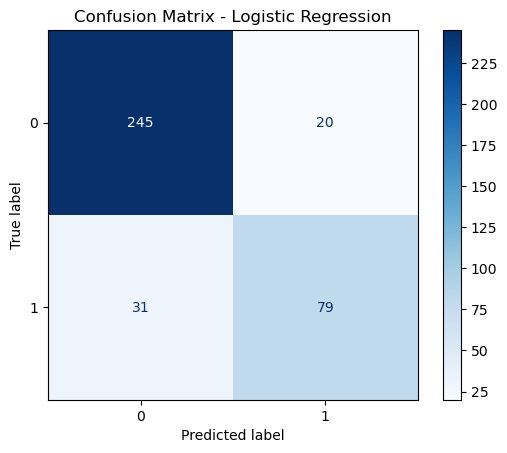

In [202]:
#Create a Confusion Matrix
#Train a Logistic Regression Classifier
clf = LogisticRegression(max_iter=200, random_state=42)
clf.fit(X_train, y_train)

#Generate Predictions
y_pred = clf.predict(X_test)

#Create a Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

#Visualize the Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

### **Saving the Model using Joblib**

In [203]:
# Save the model to a file
joblib_file = 'logistic_regression_model.joblib'
joblib.dump(clf,joblib_file)

['logistic_regression_model.joblib']

**Scaling variables for better accuracy**

Logistic Regression Model accuracy after scaling: 0.8693333333333333


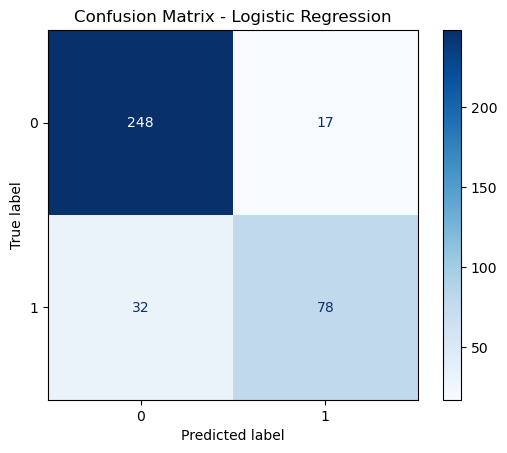

In [204]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression model on the scaled data
clf = LogisticRegression(max_iter=200, random_state=42)
clf.fit(X_train_scaled, y_train)

# Generate Predictions
y_pred = clf.predict(X_test_scaled)


# Evaluate the model
after_scaling = accuracy_score(y_test, y_pred)
after_scaling_round = np.round(after_scaling, 3)
print(f'Logistic Regression Model accuracy after scaling: {after_scaling}')

# Create a Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

#Visualize the Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


# **Using KNN approach**

In [205]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder


# Split data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0, test_size=0.2)

# Train model
model = KNeighborsClassifier(n_neighbors=2, metric='euclidean', weights='uniform', algorithm='auto', leaf_size=50, p=2)
model.fit(train_X, train_y)

# Evaluate model
val_prediction = model.predict(val_X)
y_pred_proba = model.predict_proba(val_X)[:,1]
knn_accuracy = accuracy_score(val_y, val_prediction)
knn_accuracy_round = np.round(knn_accuracy, 3)
print(f'Model accuracy: {knn_accuracy}')

print(confusion_matrix(val_y, val_prediction))
print(classification_report(val_y, val_prediction))

# auc = roc_auc_score(val_y, y_pred_proba)
# print(auc)

# Save model
joblib.dump(model, 'knn_model.pkl')

Model accuracy: 0.6966666666666667
[[195  16]
 [ 75  14]]
              precision    recall  f1-score   support

           0       0.72      0.92      0.81       211
           1       0.47      0.16      0.24        89

    accuracy                           0.70       300
   macro avg       0.59      0.54      0.52       300
weighted avg       0.65      0.70      0.64       300



['knn_model.pkl']

# **Using DecisionTree approach**

In [206]:
# Split data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0, test_size=0.2)

# Train model
model = DecisionTreeClassifier(random_state=0)
model.fit(train_X, train_y)

# Evaluate model
val_prediction = model.predict(val_X)
y_pred_proba = model.predict_proba(val_X)[:,1]
decision_accuracy = accuracy_score(val_y, val_prediction)
decision_accuracy_round = np.round(decision_accuracy, 3)
print(f'Model accuracy: {decision_accuracy}')

print(confusion_matrix(val_y, val_prediction))
print(classification_report(val_y, val_prediction))

# auc = roc_auc_score(val_y, y_pred_proba)
# print(auc)

# Save model
joblib.dump(model, 'decision_model.pkl')


Model accuracy: 0.8733333333333333
[[193  18]
 [ 20  69]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       211
           1       0.79      0.78      0.78        89

    accuracy                           0.87       300
   macro avg       0.85      0.84      0.85       300
weighted avg       0.87      0.87      0.87       300



['decision_model.pkl']

# **Using RandomForest approach**

In [207]:
# Split data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0, test_size=0.2)

# Train model
model = RandomForestClassifier(random_state=0)
model.fit(train_X, train_y)

# Evaluate model
val_prediction = model.predict(val_X)
y_pred_proba = model.predict_proba(val_X)[:,1]
rd_accuracy = accuracy_score(val_y, val_prediction)
rd_accuracy_round = np.round(rd_accuracy, 3)
print(f'Model accuracy: {rd_accuracy}')

print(confusion_matrix(val_y, val_prediction))
print(classification_report(val_y, val_prediction))

# auc = roc_auc_score(val_y, y_pred_proba)
# print(auc)

# Save model
joblib.dump(model, 'random_model.pkl')


Model accuracy: 0.9066666666666666
[[200  11]
 [ 17  72]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       211
           1       0.87      0.81      0.84        89

    accuracy                           0.91       300
   macro avg       0.89      0.88      0.89       300
weighted avg       0.91      0.91      0.91       300



['random_model.pkl']

# **Using SVC approach**

In [208]:
# Split data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0, test_size=0.2)

# Train model
model = SVC(probability=True,random_state=0)
model.fit(train_X, train_y)

# Evaluate model
val_prediction = model.predict(val_X)
y_pred_proba = model.predict_proba(val_X)[:,1]
svc_accuracy = accuracy_score(val_y, val_prediction)
svc_accuracy_round = np.round(svc_accuracy, 3)
print(f'Model accuracy: {svc_accuracy}')

print(confusion_matrix(val_y, val_prediction))
print(classification_report(val_y, val_prediction))

# auc = roc_auc_score(val_y, y_pred_proba)
# print(auc)

# Save model
joblib.dump(model, 'svc_model.pkl')

Model accuracy: 0.7166666666666667
[[203   8]
 [ 77  12]]
              precision    recall  f1-score   support

           0       0.72      0.96      0.83       211
           1       0.60      0.13      0.22        89

    accuracy                           0.72       300
   macro avg       0.66      0.55      0.52       300
weighted avg       0.69      0.72      0.65       300



['svc_model.pkl']

  # SUMMARY

In [209]:
print(f'Logistic Regression Model accuracy: {log_accuracy_round}')
print(f'Logistic Regression Model accuracy after scaling: {after_scaling_round}')
print(f'K-Nearest Neighbors (KNN) Model accuracy: {knn_accuracy_round}')
print(f'Decision Tree Model accuracy: {decision_accuracy_round}')
print(f'Random Forest Model accuracy: {rd_accuracy_round}')
print(f'Support Vector Machines (SVMs) Model accuracy: {svc_accuracy_round}')

Logistic Regression Model accuracy: 0.864
Logistic Regression Model accuracy after scaling: 0.869
K-Nearest Neighbors (KNN) Model accuracy: 0.697
Decision Tree Model accuracy: 0.873
Random Forest Model accuracy: 0.907
Support Vector Machines (SVMs) Model accuracy: 0.717


### **From the above summary, scaling the variables in the logistic regression increased the accuracy by 0.005 which is not really significant.**   
### **Decision Tree would be preffered compared to Logistic regression since it has a higher accuracy.**  
### **From these four models, Random Forest has the best accuracy (90% accurate).**  